# Data Science Environment Setup & Library Introduction

This notebook guides you through setting up a Python virtual environment and introduces key data science libraries.

**Note:** Run these commands in your terminal (not in Jupyter):

```bash
python -m venv .venv

source .venv/bin/activate

.venv/Source/activate.bat

pip install numpy pandas matplotlib seaborn scikit-learn jupyter kaggle

jupyter notebook
```

If you install the Jupyter extension in VSCode you dont need that last command

In [4]:
# Data manipulation
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.decomposition import PCA

# Visualization Parameters
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
pd.set_option('display.max_columns', None)
np.random.seed(42)

import warnings
warnings.filterwarnings('ignore')

print("Libraries imported successfully!")

Libraries imported successfully!


In [5]:
data = pd.read_csv('wdbc.data', header=None)

feature_names = [
    'radius', 'texture', 'perimeter', 'area', 'smoothness',
    'compactness', 'concavity', 'concave_points', 'symmetry', 'fractal_dimension'
]

column_names = ['id', 'diagnosis'] + \
               [f'{feat}_mean' for feat in feature_names] + \
               [f'{feat}_se' for feat in feature_names] + \
               [f'{feat}_worst' for feat in feature_names]

data.columns = column_names

print(f"Dataset shape: {data.shape}")
print(f"\nFirst few rows:")
data.head()

Dataset shape: (579, 32)

First few rows:


,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave_points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
df = data.copy()

print("Dataset Information:")
df.info()

print("Missing values:")
print(df.isnull().sum().sum())

print("\nDescriptive Statistics:")
df.describe()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 579 entries, 0 to 578
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       579 non-null    int64  
 1   diagnosis                579 non-null    object 
 2   radius_mean              579 non-null    float64
 3   texture_mean             578 non-null    float64
 4   perimeter_mean           578 non-null    float64
 5   area_mean                579 non-null    float64
 6   smoothness_mean          578 non-null    float64
 7   compactness_mean         578 non-null    float64
 8   concavity_mean           579 non-null    float64
 9   concave_points_mean      579 non-null    float64
 10  symmetry_mean            579 non-null    float64
 11  fractal_dimension_mean   579 non-null    float64
 12  radius_se                579 non-null    float64
 13  texture_se               579 non-null    float64
 14  perim

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave_points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave_points_worst,symmetry_worst,fractal_dimension_worst
count,5.790000e+02,579.000000,578.000000,578.000000,579.000000,578.000000,578.000000,579.00000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,578.000000,578.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,579.000000,578.000000
mean,3.058728e+07,17.551812,27.111107,113.997820,1043.787737,0.128009,0.136082,0.12061,0.081030,0.212116,4.241983,4.582128,36.784374,550.402563,40.144246,0.086418,0.104657,0.111025,0.091134,4.207273,5.921581,56.394447,759.557668,106.459845,874.864249,0.170034,0.290698,0.308780,0.152625,0.326558,0.122130
std,1.240679e+08,51.043225,112.168124,322.231618,5572.875982,0.454135,0.456377,0.46090,0.458438,0.448518,61.554032,61.531518,506.834914,7800.896464,45.270069,1.132799,1.131656,1.131466,1.132481,61.609957,85.440367,569.365371,10372.921892,34.915537,573.267587,0.546868,0.560367,0.575495,0.551501,0.539213,0.550486
min,8.670000e+03,0.020000,0.200000,2.000000,15.000000,0.000200,0.000200,0.00000,0.000000,0.000200,0.020000,0.020000,0.200000,0.757000,0.000200,0.000200,0.000000,0.000000,0.000000,0.004660,0.000895,2.000000,12.020000,0.000020,0.000020,0.000020,0.000000,0.000000,0.000000,0.000020,0.000020
25%,8.691610e+05,11.695000,16.172500,75.065000,420.050000,0.086012,0.065005,0.02952,0.020310,0.161850,0.057670,0.232950,0.830500,1.621000,17.830000,0.005146,0.013015,0.015035,0.007631,0.015023,0.002252,13.010000,21.070000,83.875000,512.800000,0.116400,0.146600,0.114450,0.064530,0.250300,0.071270
50%,9.062900e+05,13.380000,18.890000,86.290000,551.700000,0.095865,0.094490,0.06181,0.033840,0.179200,0.061490,0.326500,1.108000,2.310000,24.440000,0.006380,0.020450,0.025890,0.010970,0.018740,0.003212,14.970000,25.450000,97.590000,684.500000,0.131300,0.215600,0.229800,0.101000,0.282300,0.080050
75%,8.910375e+06,16.050000,21.835000,105.000000,798.300000,0.105400,0.130500,0.13200,0.074245,0.195800,0.066180,0.482950,1.474500,3.412000,45.285000,0.008156,0.032495,0.042540,0.014795,0.023520,0.004571,19.025000,29.915000,125.650000,1086.000000,0.146200,0.339500,0.385300,0.162650,0.318550,0.092105
max,9.113205e+08,1000.000000,2000.000000,6000.000000,100000.000000,8.000000,8.000000,8.00000,8.000000,8.000000,1200.000000,1200.000000,9000.000000,140000.000000,542.200000,20.000000,20.000000,20.000000,20.000000,1200.000000,1600.000000,10000.000000,180000.000000,251.200000,4254.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [7]:
# this is where we clean the data
df_clean = df.dropna(thresh=32)
df_clean = df_clean.reset_index(drop=True)
df_clean.info()
df = df_clean.copy()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 574 entries, 0 to 573
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       574 non-null    int64  
 1   diagnosis                574 non-null    object 
 2   radius_mean              574 non-null    float64
 3   texture_mean             574 non-null    float64
 4   perimeter_mean           574 non-null    float64
 5   area_mean                574 non-null    float64
 6   smoothness_mean          574 non-null    float64
 7   compactness_mean         574 non-null    float64
 8   concavity_mean           574 non-null    float64
 9   concave_points_mean      574 non-null    float64
 10  symmetry_mean            574 non-null    float64
 11  fractal_dimension_mean   574 non-null    float64
 12  radius_se                574 non-null    float64
 13  texture_se               574 non-null    float64
 14  perimeter_se             5

In [14]:
from scipy import stats
df_no_outliers = df[(np.abs(stats.zscore(df.iloc[:, 2:31])) < 5).all(axis=1)]
df_no_outliers.info()
df = df_no_outliers.copy()

data = df.copy()

<class 'pandas.core.frame.DataFrame'>
Index: 557 entries, 0 to 573
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       557 non-null    int64  
 1   diagnosis                557 non-null    object 
 2   radius_mean              557 non-null    float64
 3   texture_mean             557 non-null    float64
 4   perimeter_mean           557 non-null    float64
 5   area_mean                557 non-null    float64
 6   smoothness_mean          557 non-null    float64
 7   compactness_mean         557 non-null    float64
 8   concavity_mean           557 non-null    float64
 9   concave_points_mean      557 non-null    float64
 10  symmetry_mean            557 non-null    float64
 11  fractal_dimension_mean   557 non-null    float64
 12  radius_se                557 non-null    float64
 13  texture_se               557 non-null    float64
 14  perimeter_se             557 no

In [9]:
diagnosis_df = data[['id', 'diagnosis']]
y = data['diagnosis'].map({"M": 0, "B": 1}).to_numpy()  # 0 = Malignant, 1 = Benign
X = data.iloc[:, 2:].to_numpy()

print(f"Feature matrix shape: {X.shape}")
print(f"Labels shape: {y.shape}")
print(f"\nLabel distribution:")
print(f"Malignant (0): {np.sum(y == 0)} ({np.sum(y == 0) / len(y) * 100:.2f}%)")
print(f"Benign (1): {np.sum(y == 1)} ({np.sum(y == 1) / len(y) * 100:.2f}%)")

Feature matrix shape: (569, 30)
Labels shape: (569,)

Label distribution:
Malignant (0): 210 (36.91%)
Benign (1): 359 (63.09%)


In [ ]:

# Visualize class distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Count plot
diagnosis_counts = df['diagnosis'].value_counts()
axes[0].bar(['Malignant', 'Benign'], diagnosis_counts.values, color=['#ff6b6b', '#4ecdc4'])
axes[0].set_ylabel('Count', fontsize=12)
axes[0].set_title('Distribution of Diagnosis', fontsize=14, fontweight='bold')
for i, v in enumerate(diagnosis_counts.values):
    axes[0].text(i, v + 10, str(v), ha='center', fontsize=11, fontweight='bold')

# Pie chart
colors = ['#ff6b6b', '#4ecdc4']
axes[1].pie(diagnosis_counts.values, labels=['Malignant', 'Benign'], 
            autopct='%1.1f%%', colors=colors, startangle=90,
            textprops={'fontsize': 12, 'fontweight': 'bold'})
axes[1].set_title('Diagnosis Proportion', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

In [ ]:
# Analyze mean features
mean_features = [col for col in df.columns if '_mean' in col]

# Distribution plots for mean features
fig, axes = plt.subplots(5, 2, figsize=(15, 18))
axes = axes.ravel()

for idx, col in enumerate(mean_features):
    # Separate by diagnosis
    malignant = df[df['diagnosis'] == 'M'][col]
    benign = df[df['diagnosis'] == 'B'][col]
    
    axes[idx].hist(malignant, bins=30, alpha=0.6, label='Malignant', color='#ff6b6b')
    axes[idx].hist(benign, bins=30, alpha=0.6, label='Benign', color='#4ecdc4')
    axes[idx].set_xlabel(col, fontsize=10)
    axes[idx].set_ylabel('Frequency', fontsize=10)
    axes[idx].legend()
    axes[idx].set_title(f'Distribution of {col}', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()

In [ ]:
# Box plots for mean features
fig, axes = plt.subplots(5, 2, figsize=(15, 18))
axes = axes.ravel()

for idx, col in enumerate(mean_features):
    sns.boxplot(data=df, x='diagnosis', y=col, ax=axes[idx], 
                palette={'M': '#ff6b6b', 'B': '#4ecdc4'})
    axes[idx].set_title(f'Box Plot: {col}', fontsize=11, fontweight='bold')
    axes[idx].set_xlabel('Diagnosis', fontsize=10)
    axes[idx].set_ylabel(col, fontsize=10)

plt.tight_layout()
plt.show()

In [ ]:
# Correlation matrix for mean features
mean_df = df[mean_features]
correlation_matrix = mean_df.corr()

# Visualize correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix - Mean Features', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.show()

In [ ]:
# Find highly correlated feature pairs
threshold = 0.85
high_corr_pairs = []

for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            high_corr_pairs.append((
                correlation_matrix.columns[i],
                correlation_matrix.columns[j],
                correlation_matrix.iloc[i, j]
            ))

print(f"\nHighly correlated feature pairs (|correlation| > {threshold}):")
for feat1, feat2, corr in high_corr_pairs:
    print(f"{feat1} <-> {feat2}: {corr:.3f}")

In [ ]:
# Select key features for pair plot
key_features = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean']
pair_df = df[key_features + ['diagnosis']].copy()

# Create pair plot
sns.pairplot(pair_df, hue='diagnosis', palette={'M': '#ff6b6b', 'B': '#4ecdc4'},
             diag_kind='kde', plot_kws={'alpha': 0.6}, height=2.5)
plt.suptitle('Pair Plot - Key Features', y=1.02, fontsize=16, fontweight='bold')
plt.show()

In [10]:
# Scale features
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Center the data
mean = X_scaled.mean(axis=0)
X_centered = X_scaled - mean

# Calculate variance per feature
variance_per_feature = np.var(X_centered, axis=0, ddof=0)
total_variance = np.sum(variance_per_feature)

print(f"Total variance: {total_variance:.4f}")
print(f"\nTop 10 features by variance:")
variance_df = pd.DataFrame({
    'Feature': data.columns[2:],
    'Variance': variance_per_feature
}).sort_values('Variance', ascending=False)

print(variance_df.head(10))

X = X_centered.copy()

Total variance: 0.5535

Top 10 features by variance:
                 Feature  Variance
27  concave_points_worst  0.050977
7    concave_points_mean  0.036169
6         concavity_mean  0.033726
26       concavity_worst  0.027690
21         texture_worst  0.026864
10             radius_se  0.026339
23            area_worst  0.025604
20          radius_worst  0.023778
5       compactness_mean  0.023517
3              area_mean  0.022624


In [ ]:
# Visualize variance distribution
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Bar plot
axes[0].bar(range(len(variance_per_feature)), variance_per_feature, color='steelblue')
axes[0].set_xlabel('Feature Index', fontsize=12)
axes[0].set_ylabel('Variance', fontsize=12)
axes[0].set_title('Variance per Feature (Scaled & Centered)', fontsize=14, fontweight='bold')
axes[0].grid(axis='y', alpha=0.3)

# Top 15 features
top_15 = variance_df.head(15)
axes[1].barh(range(len(top_15)), top_15['Variance'].values, color='coral')
axes[1].set_yticks(range(len(top_15)))
axes[1].set_yticklabels(top_15['Feature'].values)
axes[1].set_xlabel('Variance', fontsize=12)
axes[1].set_title('Top 15 Features by Variance', fontsize=14, fontweight='bold')
axes[1].invert_yaxis()
axes[1].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

In [11]:
#Principle Component Analysis (PCA)
scaler_std = StandardScaler()
X_std = scaler_std.fit_transform(X)

# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_std)

explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

print(f"Variance explained by first 5 components: {cumulative_variance[4]:.4f}")
print(f"Variance explained by first 10 components: {cumulative_variance[9]:.4f}")
print(f"\nNumber of components for 95% variance: {np.argmax(cumulative_variance >= 0.95) + 1}")

Variance explained by first 5 components: 0.8307
Variance explained by first 10 components: 0.9498

Number of components for 95% variance: 11


In [ ]:
# Visualize PCA results
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

# Scree plot
axes[0].plot(range(1, len(explained_variance_ratio) + 1), 
             explained_variance_ratio, 'bo-', linewidth=2, markersize=8)
axes[0].set_xlabel('Principal Component', fontsize=12)
axes[0].set_ylabel('Explained Variance Ratio', fontsize=12)
axes[0].set_title('Scree Plot', fontsize=14, fontweight='bold')
axes[0].grid(alpha=0.3)

# Cumulative variance
axes[1].plot(range(1, len(cumulative_variance) + 1), 
             cumulative_variance, 'ro-', linewidth=2, markersize=8)
axes[1].axhline(y=0.95, color='g', linestyle='--', label='95% variance')
axes[1].set_xlabel('Number of Components', fontsize=12)
axes[1].set_ylabel('Cumulative Explained Variance', fontsize=12)
axes[1].set_title('Cumulative Explained Variance', fontsize=14, fontweight='bold')
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

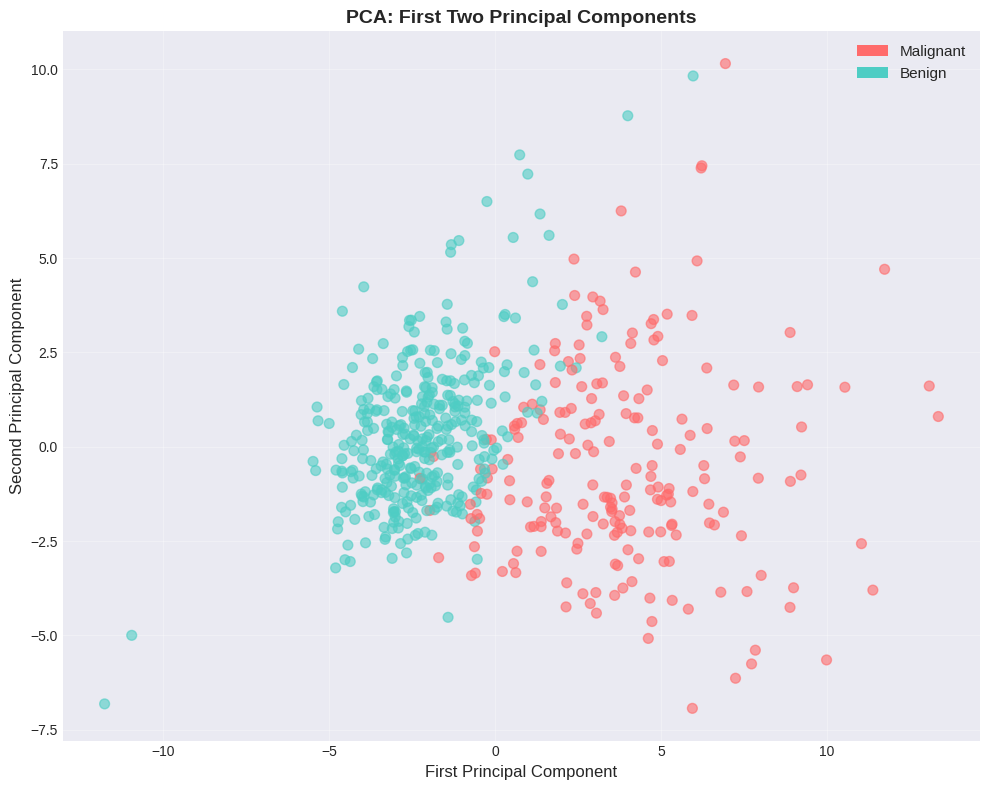

In [12]:
# Visualize first 2 principal components
plt.figure(figsize=(10, 8))
colors = ['#ff6b6b' if label == 0 else '#4ecdc4' for label in y]
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=colors, alpha=0.6, s=50)
plt.xlabel('First Principal Component', fontsize=12)
plt.ylabel('Second Principal Component', fontsize=12)
plt.title('PCA: First Two Principal Components', fontsize=14, fontweight='bold')

# Create custom legend
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor='#ff6b6b', label='Malignant'),
                   Patch(facecolor='#4ecdc4', label='Benign')]
plt.legend(handles=legend_elements, fontsize=11)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

In [13]:
#export cleaned data
cleaned_data = pd.DataFrame(X, columns=data.columns[2:])
cleaned_data['diagnosis'] = y
cleaned_data = pd.concat([diagnosis_df['id'], cleaned_data], axis=1)
#write to file
cleaned_data.to_csv('cleaned_wdbc_data.csv', index=False)
